### Importing the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import module

%matplotlib inline

### Load dataset from directory

In [26]:
image_types = ["day", "night"]

training_dir = 'day_night_images/training'
test_dir = 'day_night_images/test'

Shape: (700, 1280, 3)
Label: day


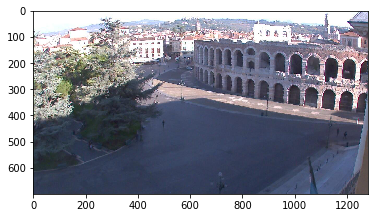

In [27]:
training_dataset = module.load_dataset(image_types,training_dir)

#Visualize the dataset
num = 1
image = training_dataset[num][0]
label = training_dataset[num][1]

print("Shape: " + str(image.shape))
print("Label: " + label)
plt.imshow(image)

### Standardize every one of the picture at the same size : 600 x 1100 ( WxH )

In [6]:
#Standardize them
def standard_image(image):
    return cv2.resize(image, (1100, 600))

def encode(label):
    
    value = 0
    if label == 'day':
        value = 1
    
    return value

def standardize(image_list):
    
    save = []
    
    for item in image_list:
        image = item[0]
        label = item[1]
        
        standard_img = standard_image(image)
        
        binary_label = encode(label)
        
        save.append((standard_img, binary_label))
        
    return save

standard_img = standardize(dataset)

Shape :  (600, 1100, 3)
Label [day = 1, night = 0]:  1


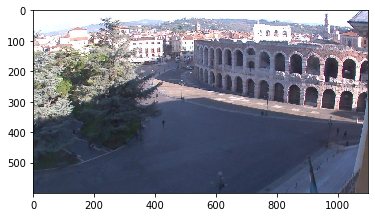

In [15]:
#Visualize the image
nums = 1
imag = standard_img[nums][0]
binary_label = standard_img[nums][1]

print('Shape : ', str(imag.shape))
print('Label [day = 1, night = 0]: ', str(binary_label))
plt.imshow(imag)

### Feature Extraction

Lets visualize the picture in HSV colors

Label: 1


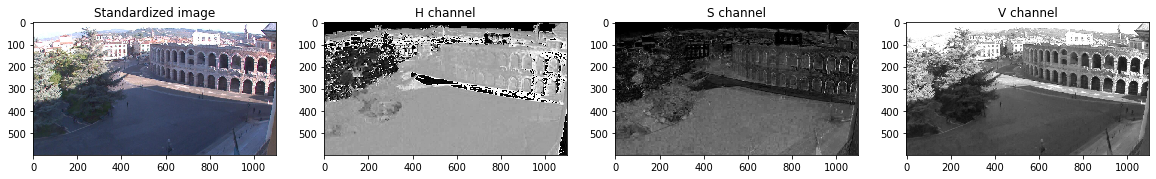

In [16]:
test_image = standard_img[nums][0]
test_label = standard_img[nums][1]

hsv = cv2.cvtColor(test_image, cv2.COLOR_RGB2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Print image label
print('Label: ' + str(test_label))

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_image)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [17]:
def average_brightness(image):
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    v = hsv_image[:,:,2]
    
    area = hsv_image.shape[0] * hsv_image.shape[1]
    
    value = np.sum(v)/area
    return value

Average brightness : 131.84751212121213


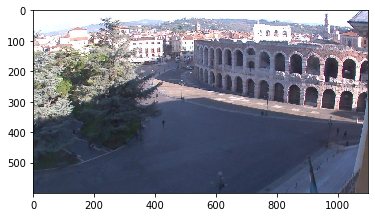

In [18]:
avg = average_brightness(test_image)

print('Average brightness : ' + str(avg))
plt.imshow(test_image)

### Classifications

In [20]:
def estimate_label(image):
    
    avg = average_brightness(image)
    
    predicted_label = 0
    threshold = 100
    
    if avg > threshold:
        predicted_label = 1
        
    return predicted_label

In [33]:
import random

test_dataset = module.load_dataset(image_types,test_dir)

standard_test = standardize(test_dataset)

random.shuffle(standard_test)

In [34]:
def misclassifed(image_list):
    
    save_misclassified = []
    
    for item in image_list:
        image = item[0]
        true_label = item[1]
        
        predicted_label = estimate_label(image)
        
        if predicted_label != true_label:
            save_misclassified.append((image, predicted_label, true_label))
        
    return save_misclassified
        

Accuracy : 92.5%
Prediction label : 1
True label : 0
Label = [day = 1, night = 0]


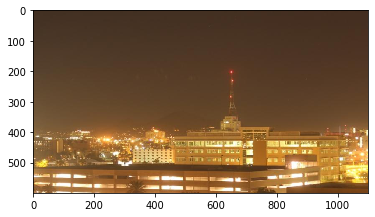

In [51]:
missed = misclassifed(standard_test)

total = len(standard_test)
fail  = len(missed)
accuracy = (total - fail)/total

print('Accuracy : ' + str(accuracy*100) + '%')
print("Number of misclassified images = " + str(fail) +' out of '+ str(total))

# Visualize the wrong classified
test = 0
fail_image = missed[test][0]
predicted_label = missed[test][1]
true_label = missed[test][2]

print('Prediction label : ' + str(predicted_label))
print('True label : ' + str(true_label))
print('Label = [day = 1, night = 0]')
plt.imshow(fail_image)